## <center>Near Infrared and Hyperspectral Imaging in tandem with Chemometrics and Machine Learning for Fraud Detection in Coffee</center> 

### <left> 1. Research Outlook </left>

<div style="text-align: justify;">
    Food fraud is an increasingly pressing concern, affecting both consumer confidence and the integrity of global markets. Coffee, one of the world’s most consumed beverages, is particularly vulnerable to adulteration, where cheaper, inferior substances are blended with authentic products. This project will explore the use of Near-Infrared Hyperspectral Imaging (NIR-HSI) combined with `Machine Learning (ML) techniques to detect coffee adulteration. NIR-HSI captures detailed spectral and spatial data across a wide range of wavelengths, revealing subtle chemical and physical differences. The aim is to explore the potential of combining this technology with chemometrics and machine learning to detect fraud in both ground and freeze-dried instant Arabica coffee adulterated with Robusta. 
</div>

   
<div style="text-align: justify;">   
    The collected data will undergo preprocessing, followed by Principal Component Analysis (PCA) for dimensionality reduction. Supervised and unsupervised classification techniques will then be employed to classify samples based on their authenticity, while regression models will be used to quantify the degree of adulteration. This combined approach seeks to develop a reliable, scientific framework for detecting fraud in processed coffee, contributing to improved transparency and quality assurance in the coffee industry.    
</div>

### <left> 2. Data </left>

A total of `30 coffee samples` were purchased from different countries, all of which are major coffee producers. This included `25 Arabica` and `5 Robusta` samples. The beans were roasted to a medium roast for 15 minutes at 220°C. After roasting, the coffee was cooled overnight and then ground into a fine powder for analysis.

The adulteration study involved mixing `16 Arabica samples` with `3 distinct Robusta samples` to create the `training set`, while the remaining `9 Arabica samples` were mixed with `2 Robusta samples` to form the `test set`. Adulteration levels were set at 0%, 1%, 5%, 10%, 20%, 40%, 60%, 80%, and 100% to simulate different levels of fraud. The samples were subsequently analysed by Hyperspectral Imaging (HSI) in triplicate. 

### <left> 3. Data Cleaning</left>

In [7]:
# Load packages 
# ==========================
# 1️⃣ System & Data Handling
# ==========================
import os
import pandas as pd
import numpy as np
# ==========================
# 2️⃣ Data Visualization
# ==========================
import seaborn as sns
import matplotlib.pyplot as plt
# ==========================
# 3️⃣ Clustering Algorithms
# ==========================
from sklearn.cluster import KMeans, DBSCAN
# ==========================
# 4️⃣ Preprocessing & Feature Engineering
# ==========================
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
# ==========================
# 5️⃣ Model Selection & Hyperparameter Tuning
# ==========================
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV, 
    cross_val_score, 
    StratifiedKFold, 
    RepeatedStratifiedKFold, 
    cross_validate
)
# ==========================
# 6️⃣ Classification Models
# ==========================
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier  
# ==========================
# 7️⃣ Model Evaluation & Metrics
# ==========================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, 
    make_scorer, roc_curve, auc, roc_auc_score, 
    precision_recall_curve, average_precision_score
)

In [8]:
# Change working directory
os.chdir('C:\\Users\\abc\\OneDrive - UGent\\Documenten\\Derick Malavi_PhD Docs_UGent\\Manuscript 4_Coffee')

In [9]:
# Load the hyperspectral imaging data 
# The data set has been preprocessed by applying multiplicative scatter correction to remove noise and further subjected to Savitzky Golay treatmment and second derivative
data = 'coffee_ground_msc_sg_2d.csv'
coffee_data = pd.read_csv(data)

In [10]:
# Check the number of rows and columns 
coffee_data.shape

(1469, 229)

In [11]:
# Check whether it is a data frame
type(coffee_data)

pandas.core.frame.DataFrame

In [12]:
#Check the first five rows of the data 
coffee_data.head(5)

,sample_id,binary_class,three_class,adult_percent,cal_val,935.609985,939.059998,942.52002,945.97998,949.429993,...,1688.02002,1691.589966,1695.170044,1698.75,1702.329956,1705.910034,1709.48999,1713.069946,1716.650024,1720.22998
0,Pure_Arabica_10,pure_arabica,pure_arabica,0,1,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,...,-0.000658,-0.000619,-0.000515,-0.000377,-0.000377,-0.000377,-0.000377,-0.000377,-0.000377,-0.000377
1,Pure_Arabica_3,pure_arabica,pure_arabica,0,1,-0.000654,-0.000654,-0.000654,-0.000654,-0.000654,...,-0.000777,-0.000723,-0.000591,-0.000411,-0.000411,-0.000411,-0.000411,-0.000411,-0.000411,-0.000411
2,Pure_Arabica_2,pure_arabica,pure_arabica,0,1,-0.000797,-0.000797,-0.000797,-0.000797,-0.000797,...,-0.000730,-0.000671,-0.000553,-0.000399,-0.000399,-0.000399,-0.000399,-0.000399,-0.000399,-0.000399
3,Pure_Arabica_2,pure_arabica,pure_arabica,0,1,-0.000678,-0.000678,-0.000678,-0.000678,-0.000678,...,-0.000737,-0.000669,-0.000546,-0.000391,-0.000391,-0.000391,-0.000391,-0.000391,-0.000391,-0.000391
4,Pure_Arabica_2,pure_arabica,pure_arabica,0,1,-0.000704,-0.000704,-0.000704,-0.000704,-0.000704,...,-0.000652,-0.000609,-0.000525,-0.000411,-0.000411,-0.000411,-0.000411,-0.000411,-0.000411,-0.000411


In [13]:
# Check the last five rows
coffee_data.tail(5)

,sample_id,binary_class,three_class,adult_percent,cal_val,935.609985,939.059998,942.52002,945.97998,949.429993,...,1688.02002,1691.589966,1695.170044,1698.75,1702.329956,1705.910034,1709.48999,1713.069946,1716.650024,1720.22998
1464,Pure_Robusta_5,adulterated,pure_robusta,100,2,-0.000563,-0.000563,-0.000563,-0.000563,-0.000563,...,-0.000617,-0.000642,-0.000608,-0.000516,-0.000516,-0.000516,-0.000516,-0.000516,-0.000516,-0.000516
1465,Pure_Robusta_5,adulterated,pure_robusta,100,2,-0.000658,-0.000658,-0.000658,-0.000658,-0.000658,...,-0.000687,-0.000677,-0.000603,-0.000491,-0.000491,-0.000491,-0.000491,-0.000491,-0.000491,-0.000491
1466,Pure_Robusta_5,adulterated,pure_robusta,100,2,-0.000566,-0.000566,-0.000566,-0.000566,-0.000566,...,-0.000692,-0.000685,-0.000617,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509,-0.000509
1467,Pure_Robusta_3,adulterated,pure_robusta,100,1,-0.000811,-0.000811,-0.000811,-0.000811,-0.000811,...,-0.000642,-0.000657,-0.000618,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559
1468,Pure_Robusta_4,adulterated,pure_robusta,100,2,-0.000869,-0.000869,-0.000869,-0.000869,-0.000869,...,-0.000640,-0.000632,-0.000574,-0.000476,-0.000476,-0.000476,-0.000476,-0.000476,-0.000476,-0.000476


In [14]:
# Check for any missing values
coffee_data.isnull().sum().any()

False

In [15]:
# Check data for object data types
coffee_data.select_dtypes(include=['object']).dtypes

sample_id       object
binary_class    object
three_class     object
dtype: object

In [16]:
# The values have to be between 0 and 1 (Normalized). Let us check if there any extreme values beyond our max values

min_value = coffee_data.iloc[:, 5:226].min().min()  # Overall min value
max_value = coffee_data.iloc[:, 5:226].max().max()  # Overall max value

print(f'The minimum value is {min_value} and the maximum value is {max_value}')

The minimum value is -0.001698349 and the maximum value is 0.001777631


In [17]:
# Check the number of samples for the classes

binary_class = coffee_data.groupby('binary_class')['binary_class'].count()
print(binary_class)

binary_class
adulterated     1394
pure_arabica      75
Name: binary_class, dtype: int64


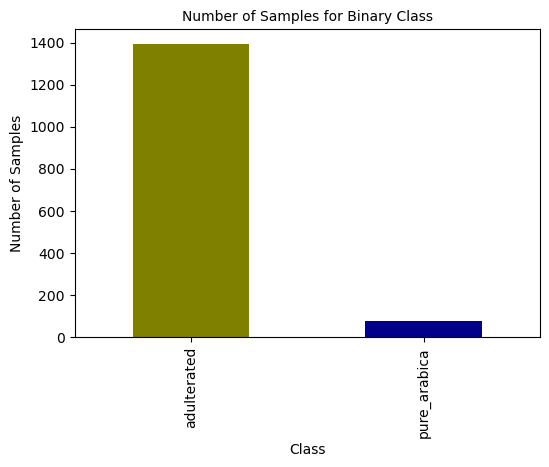

In [18]:
# Plotting bar graph to display the groups
plt.figure(figsize=(6,4))  
binary_class.plot(kind='bar', color=['olive', 'darkblue'])

# Add labels and title
plt.title('Number of Samples for Binary Class', fontsize=10, loc='center')
plt.xlabel('Class', fontsize=10, loc='center')
plt.ylabel('Number of Samples', fontsize=10, loc='center')

# Display the plot
plt.show()

- The two classes are `highly imbalanced`. We will have to `balance the dataeset` when training the classification models. Techniques such as `SMOTE` will be evaluated.

In [20]:
# Let us also check the three classes 
three_class = coffee_data.groupby('three_class')['three_class'].count()
print(three_class)

three_class
adulterated     1379
pure_arabica      75
pure_robusta      15
Name: three_class, dtype: int64


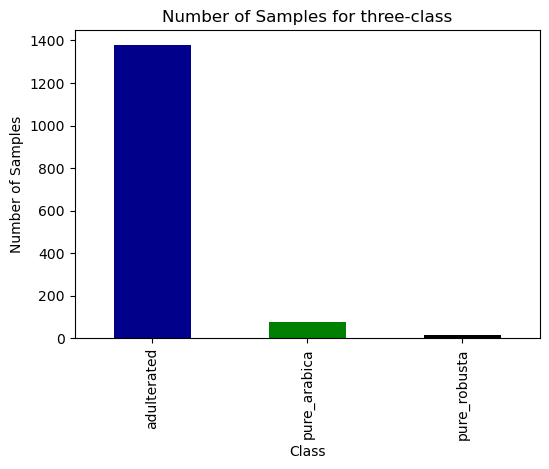

In [21]:
# Plotting 
plt.figure(figsize=(6,4))  
three_class.plot(kind='bar', color=['darkblue', 'green', 'black'])

# Add labels and title
plt.title('Number of Samples for three-class', fontsize=12, loc='center')
plt.xlabel('Class', fontsize=10, loc='center')
plt.ylabel('Number of Samples', fontsize=10, loc='center')
# Display the plot
plt.show()

In [22]:
# Check the number of samples for trainng/cross-validation and testing models
calibration = coffee_data[coffee_data['cal_val'] == 1]['cal_val'].count()
external_validation = coffee_data[coffee_data['cal_val'] == 2]['cal_val'].count()
percent_calibration = round((calibration/(calibration + external_validation))*100,0)
percent_validation = round((external_validation/(calibration + external_validation))*100,0)

print(f'The number of samples for training models will be {calibration} samples or {percent_calibration}%, while those for testing the models will be {external_validation} samples or {percent_validation}%.')

The number of samples for training models will be 1055 samples or 72.0%, while those for testing the models will be 414 samples or 28.0%.


In [23]:
spectral_columns = coffee_data.iloc[:,5:226]
spectral_columns.head()

,935.609985,939.059998,942.52002,945.97998,949.429993,952.890015,956.349976,959.809998,963.27002,966.72998,...,1677.290039,1680.869995,1684.439941,1688.02002,1691.589966,1695.170044,1698.75,1702.329956,1705.910034,1709.48999
0,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,-0.000875,-0.000604,-0.000397,...,-0.000494,-0.000559,-0.000634,-0.000658,-0.000619,-0.000515,-0.000377,-0.000377,-0.000377,-0.000377
1,-0.000654,-0.000654,-0.000654,-0.000654,-0.000654,-0.000654,-0.000654,-0.000719,-0.000522,-0.000356,...,-0.000595,-0.000672,-0.000756,-0.000777,-0.000723,-0.000591,-0.000411,-0.000411,-0.000411,-0.000411
2,-0.000797,-0.000797,-0.000797,-0.000797,-0.000797,-0.000797,-0.000797,-0.000837,-0.000580,-0.000385,...,-0.000591,-0.000649,-0.000726,-0.000730,-0.000671,-0.000553,-0.000399,-0.000399,-0.000399,-0.000399
3,-0.000678,-0.000678,-0.000678,-0.000678,-0.000678,-0.000678,-0.000678,-0.000752,-0.000558,-0.000363,...,-0.000630,-0.000689,-0.000744,-0.000737,-0.000669,-0.000546,-0.000391,-0.000391,-0.000391,-0.000391
4,-0.000704,-0.000704,-0.000704,-0.000704,-0.000704,-0.000704,-0.000704,-0.000766,-0.000550,-0.000365,...,-0.000504,-0.000559,-0.000634,-0.000652,-0.000609,-0.000525,-0.000411,-0.000411,-0.000411,-0.000411


### <left> 4. Plotting the Spectra </left>

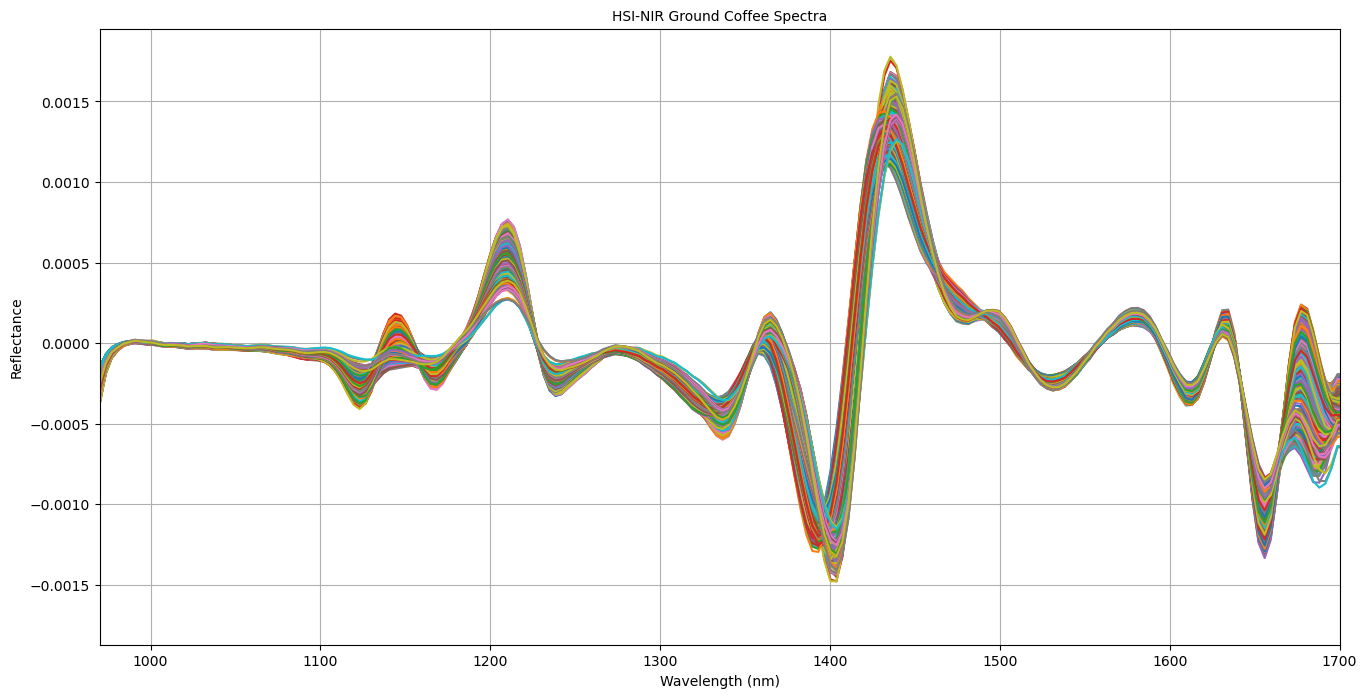

In [25]:
# It is critical to visualize the spectra. We can first plot 'blindly' without the class labels

# Get the wavelengths from the column names 
wavelengths = spectral_columns.columns.astype(float)

# Plot the spectral data
plt.figure(figsize=(16, 8))

# Iterate through each row in the spectral data and plot the spectrum
for index, row in spectral_columns.iterrows():
    plt.plot(wavelengths, row, label=f'Sample {index}')
    
# Add title and labels
plt.title('HSI-NIR Ground Coffee Spectra', fontsize=10)
plt.xlabel('Wavelength (nm)', fontsize=10)
plt.ylabel('Reflectance', fontsize=10)
plt.xlim(970,1700)
plt.grid()   
# Show the plot
plt.show()

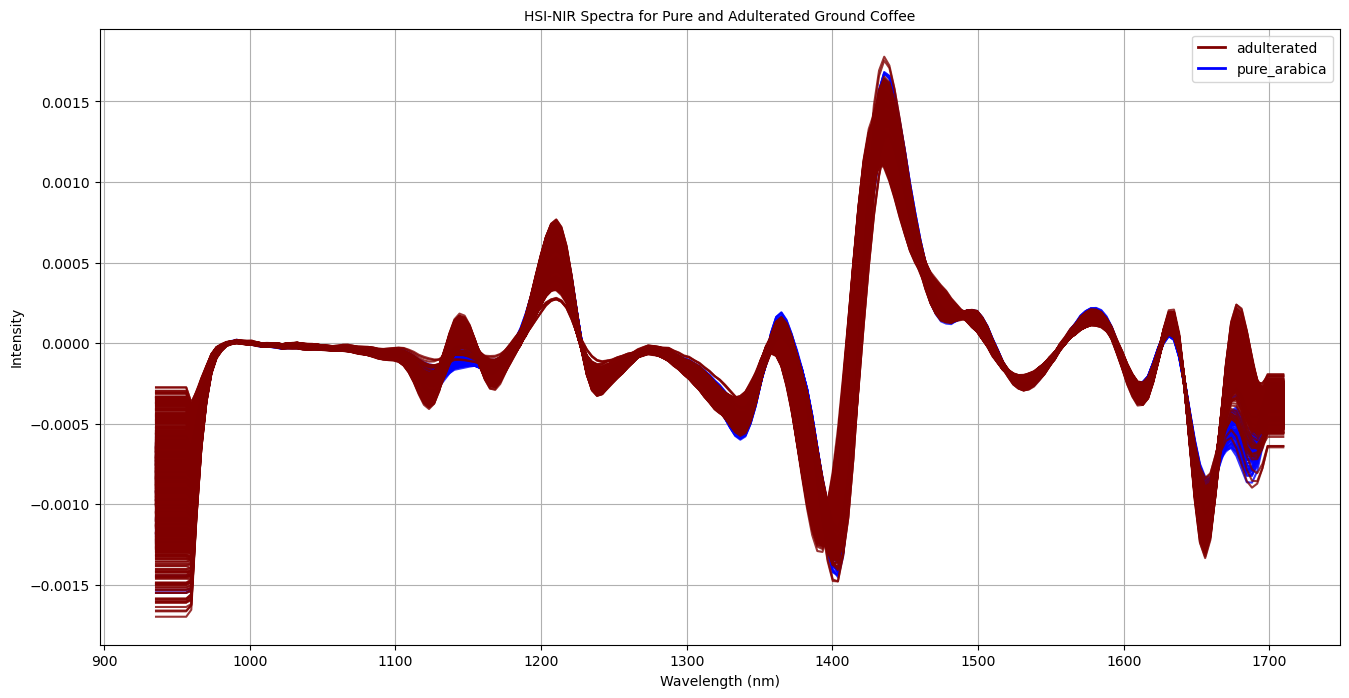

In [26]:
# Spectra plot based on binary classification: pure vs adulterated coffee

# Define the binary class
binary_class = coffee_data['binary_class']

# Extract the spectral wavelengths 
wavelengths = spectral_columns.columns.astype(float)

# Define the color pallete 
palette = {"adulterated": "maroon", "pure_arabica": "blue"}

# Plot the spectral data with colors based on the binary_class
plt.figure(figsize=(16, 8))

# Iterate over each row and plot, using the binary_class to color each sample
for index, row in spectral_columns.iterrows():
    class_label = binary_class.iloc[index]
    plt.plot(wavelengths, row, color=palette[class_label], label=class_label if index == 0 else "", alpha=0.8)

# Add title and labels
plt.title('HSI-NIR Spectra for Pure and Adulterated Ground Coffee', fontsize=10)
plt.xlabel('Wavelength (nm)', fontsize=10)
plt.ylabel('Intensity', fontsize=10)

# Add legend
handles = [plt.Line2D([0], [0], color=palette[class_label], lw=2) for class_label in palette]
labels = palette.keys()
plt.legend(handles, labels, loc='upper right')
plt.grid()
# Show the plot
plt.show()

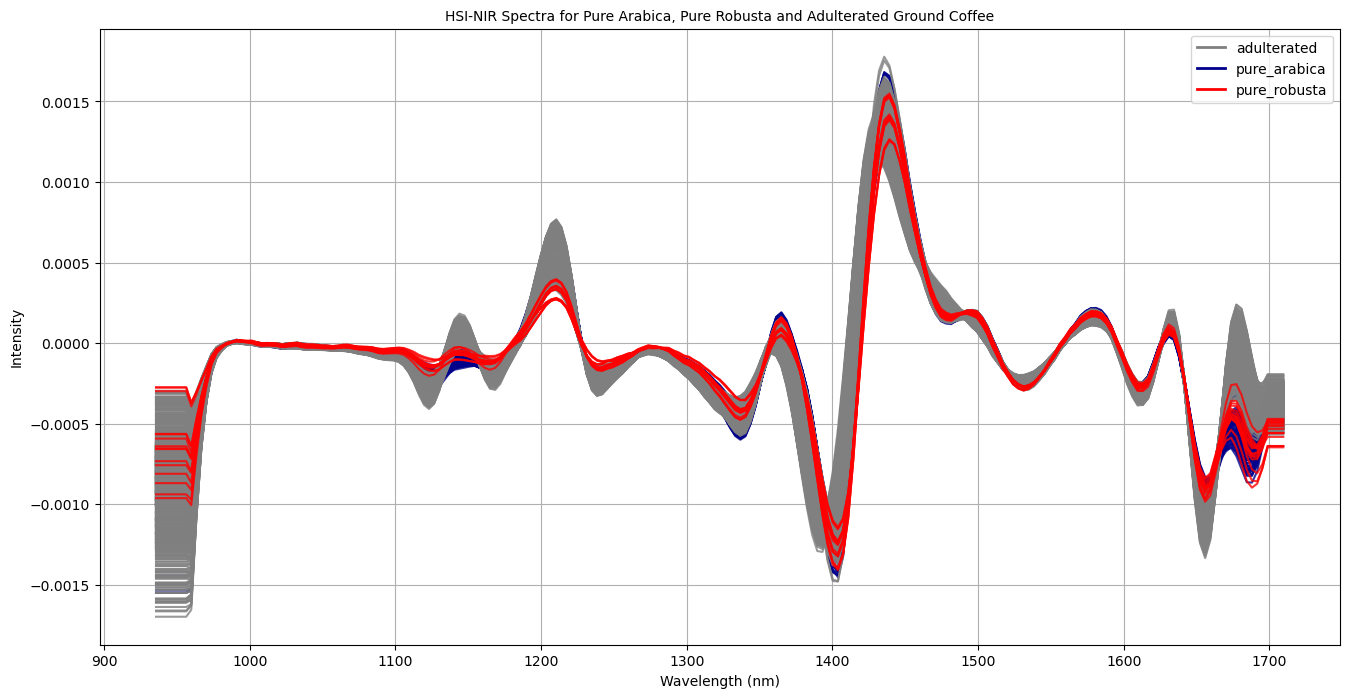

In [27]:
# Spectra plot based on three classes: pure arabica, pure robusta and adulterated coffee (arabica+robusta)

# Define the three classes
three_class = coffee_data['three_class']

# Extract the spectral wavelengths 
wavelengths = spectral_columns.columns.astype(float)

# Define the color pallete 
palette = {"adulterated": "grey", "pure_arabica": "darkblue", "pure_robusta": "red"}

# Plot the spectral data with colors based on the three_class
plt.figure(figsize=(16, 8))

# Iterate over each row and plot, using the three_class to color each sample
for index, row in spectral_columns.iterrows():
    class_label = three_class.iloc[index]
    plt.plot(wavelengths, row, color=palette[class_label], label=class_label if index == 0 else "", alpha=0.8)

# Add title and labels
plt.title('HSI-NIR Spectra for Pure Arabica, Pure Robusta and Adulterated Ground Coffee', fontsize=10)
plt.xlabel('Wavelength (nm)', fontsize=10)
plt.ylabel('Intensity', fontsize=10)

# Add legend
handles = [plt.Line2D([0], [0], color=palette[class_label], lw=2) for class_label in palette]
labels = palette.keys()
plt.legend(handles, labels, loc='upper right')
plt.grid()
# Show the plot
plt.show()

- The spectral profile reveals differences in intensity values between adulterated samples and both pure Arabica and pure Robusta, highlighting the potential of hyperspectral imaging for distinguishing these groups.

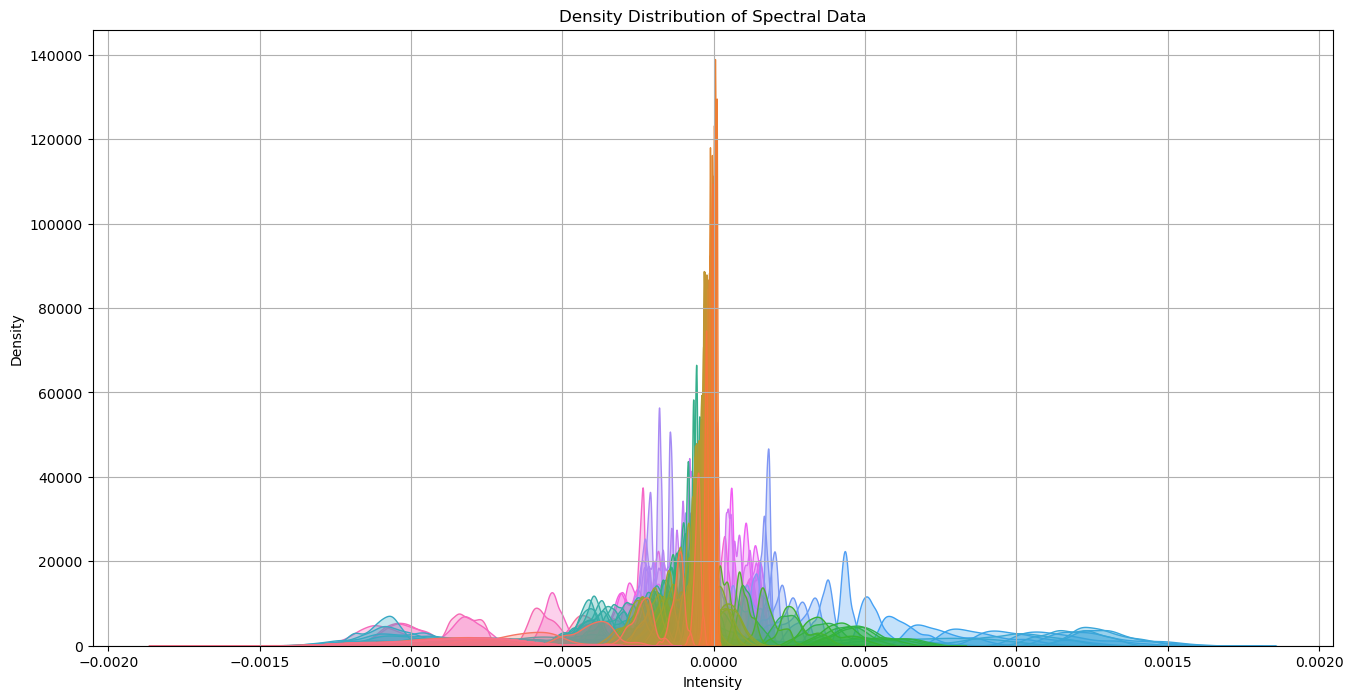

In [29]:
# Plot KDE for spectral data
plt.figure(figsize=(16, 8))
sns.kdeplot(data=spectral_columns, fill=True, common_norm=False, alpha=0.3,legend=False)
plt.xlabel("Intensity")
plt.title("Density Distribution of Spectral Data")
plt.grid()
plt.show()

- The data shows normal distribution.

### <left> 5. Principal Component Analysis</left>

This section investigates whether `Principal Component Analysis (PCA)` can effectively differentiate pure Arabica, pure Robusta, and adulterated coffee samples based on spectral data. Using unsupervised learning, we aim to determine whether PCA can reduce high-dimensional spectral features while preserving meaningful differences between sample groups.

**Objectives**

    - Apply PCA to spectral data from coffee samples.
    - Examine whether PCA can reveal clusters that correspond to different coffee types.
    - Assess its potential for feature reduction and preprocessing for classification models.
    - Evaluate whether PCA alone is sufficient for visualization or if additional methods are needed.

- It serves as a first step in understanding the role of dimensionality reduction in coffee authentication and adulteration detection.

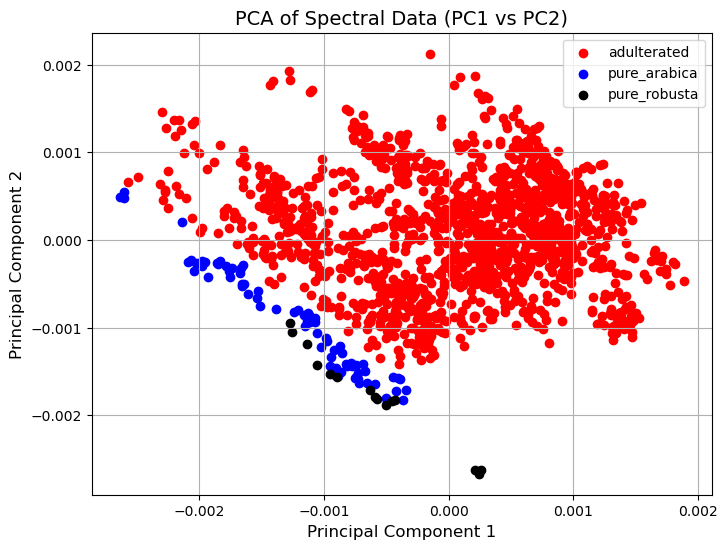

Explained variance by PC1: 0.55
Explained variance by PC2: 0.33


In [120]:
import pandas as pd
from sklearn.decomposition import PCA

X = spectral_columns
# Apply PCA - let's reduce to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Convert the PCA result into a DataFrame for easier handling
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Include the classes (adulterated/pure_arabica/pure robusta) in the PCA result for labeling
pca_df['three_class'] = coffee_data['three_class']

# Plot the first two principal components with color coding based on binary class
plt.figure(figsize=(8, 6))
for label, color in zip(['adulterated', 'pure_arabica','pure_robusta'], ['red', 'blue','black']):
    subset = pca_df[pca_df['three_class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, color=color, alpha=1.0)

# Add plot labels and title
plt.title('PCA of Spectral Data (PC1 vs PC2)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid()
plt.show()


# Explained variance of each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")


- `PC1 and PC2 account for 88% of the variation` in the original data.
- While there appears to be a subtle separation between adulterated coffee (1–80%) and both pure Arabica and pure Robusta, a clearer discriminatory boundary needs to be established through `supervised learning`.

#### **t-distributed stochastic neighbor embedding (t-SNE)**

In [123]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42,init='pca')
X_tsne = tsne.fit_transform(X)

# Convert to DataFrame for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df[['Class', 'adulter_percent']] = coffee_data[['three_class','adult_percent']]  # Add labels

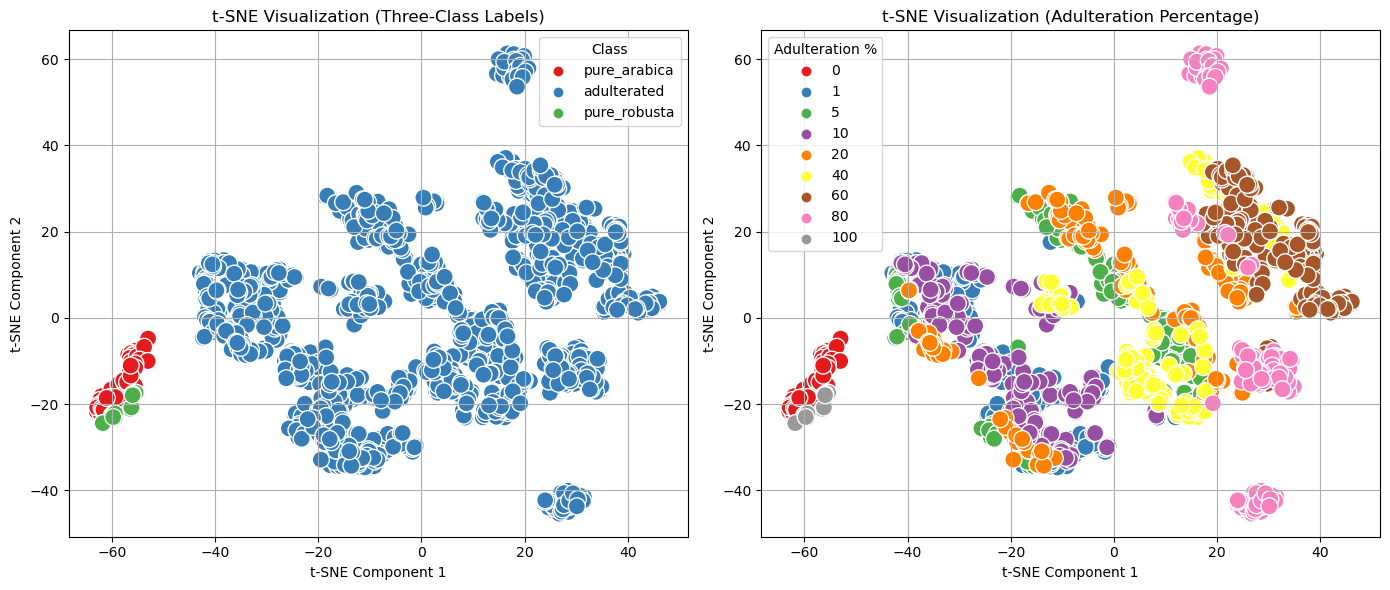

In [124]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Cluster based on classes
sns.scatterplot(ax=axes[0], data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set1', alpha=1.0,s=150)
axes[0].set_title("t-SNE Visualization (Three-Class Labels)")
axes[0].set_xlabel("t-SNE Component 1")
axes[0].set_ylabel("t-SNE Component 2")
axes[0].legend(title="Class",loc='best')
axes[0].grid(True)

# Plot 2: Cluster based on percent adulteration
sns.scatterplot(ax=axes[1], data=tsne_df, x='TSNE1', y='TSNE2', hue='adulter_percent', palette='Set1', alpha=1.0,s=150)
axes[1].set_title("t-SNE Visualization (Adulteration Percentage)")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")
axes[1].legend(title="Adulteration %",loc='best')
axes[1].grid(True)

# Display both plots
plt.tight_layout()
plt.show()

In [125]:
adulteration_counts = tsne_df.groupby('adulter_percent').size()
adulteration_counts

adulter_percent
0       75
1      198
5      197
10     201
20     189
40     198
60     198
80     198
100     15
dtype: int64

- tSNE clearly separates adulterated coffee (1-80%) from both pure Arabica and Robusta. The technique is not, however, capable of distinguishing pure Arabica from Robusta.

### <left> 6. Clustering: K-Means Clustering </left>

In [128]:
# Use PCA data for KMeans clustering
pca_df.head()

,PC1,PC2,three_class
0,-0.000975,-0.001154,pure_arabica
1,-0.000656,-0.001637,pure_arabica
2,-0.000852,-0.001292,pure_arabica
3,-0.000672,-0.001492,pure_arabica
4,-0.000688,-0.001416,pure_arabica


In [129]:
k_means_df = pca_df.copy()

k_means_X = k_means_df[['PC1','PC2']]

In [130]:
# Define K-Means with a known number of clusters
k = 3  # Three groups: Pure Arabica, Pure Robusta, Adulterated 

# Apply K-means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit the model
kmeans.fit(k_means_X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add cluster label to the original data frame
k_means_df['k_cluster'] = labels

# Display first few rows
k_means_df.head(5)

,PC1,PC2,three_class,k_cluster
0,-0.000975,-0.001154,pure_arabica,2
1,-0.000656,-0.001637,pure_arabica,2
2,-0.000852,-0.001292,pure_arabica,2
3,-0.000672,-0.001492,pure_arabica,2
4,-0.000688,-0.001416,pure_arabica,2


In [131]:
# Count number of samples in each cluster
k_groups = k_means_df.groupby('k_cluster')['three_class'].count()
print(k_groups)

k_cluster
0    755
1    341
2    373
Name: three_class, dtype: int64


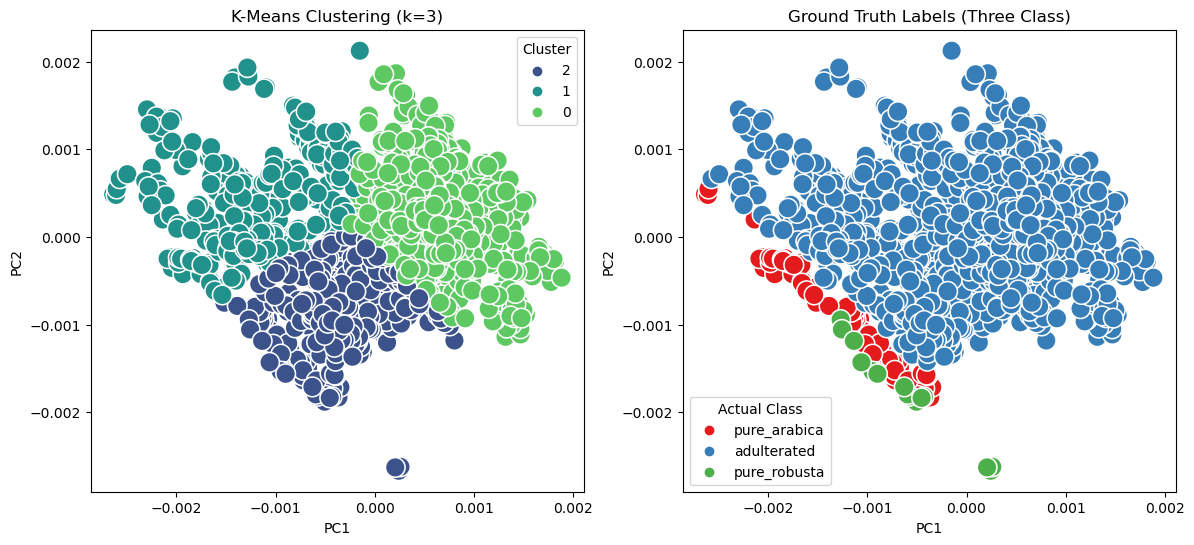

<Figure size 800x600 with 0 Axes>

In [132]:
# Convert 'k_cluster' to a categorical type for better coloring
k_means_df['k_cluster'] = k_means_df['k_cluster'].astype(str)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(ax=axes[0], data=k_means_df, x='PC1', y='PC2', hue='k_cluster', palette='viridis', alpha=1.0,s=200)
axes[0].set_title(f'K-Means Clustering (k={k})')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(title="Cluster", loc="best")


# Plot Actual Three-Class Labels
sns.scatterplot(ax=axes[1], data=k_means_df,x='PC1',y='PC2',hue='three_class', palette='Set1',alpha=1.0,s=200)
axes[1].set_title("Ground Truth Labels (Three Class)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].legend(title="Actual Class", loc="best")

# Adjust layout
plt.tight_layout()
plt.show()

In [133]:
# Find the number of clusters with the elbow method 
import warnings
warnings.filterwarnings("ignore")  # Suppresses all warnings

# Compute WCSS for different K values
wcss = []
K_range = range(2, 31)  # Test K from 2 to 31

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(k_means_X)
    wcss.append(km.inertia_)  # WCSS (within-cluster sum of squares)

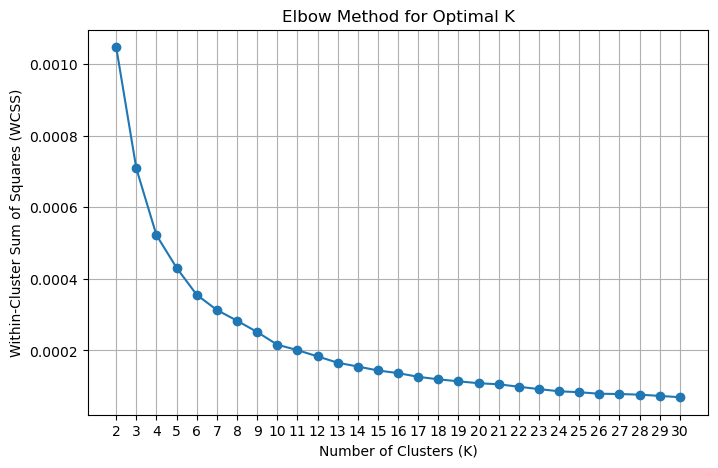

In [134]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

- K-Means clustering `does not effectively distinguish` between the groups hence need for supervised classification

In [136]:
#!pip install umap-learn

In [137]:
# Apply UMAP
import umap
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
X_umap = umap_model.fit_transform(k_means_X)

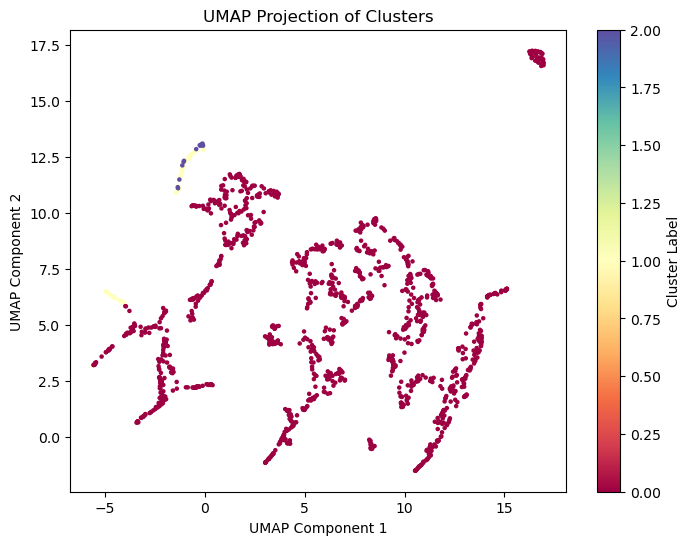

In [138]:
# Convert categorical labels to numerical if needed
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(k_means_df['three_class'])

# Plot results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='Spectral', s=5)
plt.colorbar(label="Cluster Label")
plt.title("UMAP Projection of Clusters")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

### <left> 6. Supervised Classification</left>

In [140]:
# Split the data into training and validation

# Rememeber from our cal-val column, entry '1' samples are for trainng the models while '2' are for testing the model. This is done to avoid data leakage

# Extract the X and y variables
X = spectral_columns
y = coffee_data['binary_class']

# Create a calibration validation mask
train_mask = coffee_data['cal_val']==1
test_mask = coffee_data['cal_val']==2

# Split X
X_train = X[train_mask]
X_test = X[test_mask]

# Split y
y_train = y[train_mask]
y_test = y[test_mask]

# print the shape
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (1055, 221)
X_test: (414, 221)
y_train: (1055,)
y_test: (414,)


In [141]:
# Due to data imbalance, we will create synthetic samples using SMOTE
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print shapes to confirm resampling
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)

X_train_smote shape: (2014, 221)
y_train_smote shape: (2014,)


In [142]:
# Due to the high dimensions, we will use PCA to reduce the variables

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train_smote)

# Transform X_test set
X_test_pca = pca.transform(X_test)

# print the shape
print(f'X_train: {X_train_pca.shape}')
print(f'X_test: {X_test_pca.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (2014, 5)
X_test: (414, 5)
y_train: (1055,)
y_test: (414,)


In [143]:
total_var = np.sum(pca.explained_variance_ratio_)*100

print(f'Total Variance explained by the PCS: {total_var:.2f}%')

Total Variance explained by the PCS: 99.36%


In [144]:
# Save PCA for future reduction dimension 
import joblib
joblib.dump(pca,'pca_transform.pkl')

['pca_transform.pkl']

#### **Linear Discriminant Analysis (LDA)**

In [146]:
import time

# Define LDA model
lda = LinearDiscriminantAnalysis()


# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get the correct max value for n_components
max_components = min(X_train_smote.shape[1], len(np.unique(y_train_smote)) - 1)

# Define parameter grid with correct range
param_grid = {'n_components': list(range(1, max_components + 1))}

# Perform GridSearchCV
grid_search_lda = GridSearchCV(lda, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

# Start training time
start_time = time.time()

# Fit the model
grid_search_lda.fit(X_train_smote, y_train_smote)

# End training time
end_time = time.time()
time_taken = (end_time - start_time) / 60
print(f'Time taken to train the model: {time_taken:.2f} minutes')

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Time taken to train the model: 0.11 minutes


In [147]:
grid_search_lda

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1]}, scoring='accuracy', verbose=1)

In [148]:
print(f'Best LDA Model SCore: {grid_search_lda.best_score_:.4f}')

Best LDA Model SCore: 0.9995


In [149]:
best_lda_model = grid_search_lda.best_estimator_
print(f'Best Parameters: {grid_search_lda.best_params_}')

Best Parameters: {'n_components': 1}


In [150]:
# Get best number of components
best_n_components = grid_search_lda.best_params_['n_components']
best_n_components

1

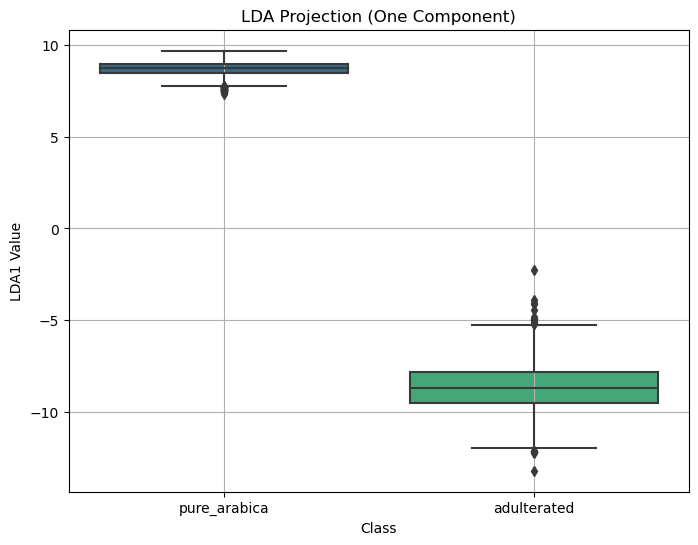

In [151]:
# Transform training data to LDA component
X_train_lda = best_lda_model.transform(X_train_smote)

# Convert to DataFrame for plotting
lda_train_df = pd.DataFrame(X_train_lda, columns=['LDA1'])
lda_train_df['Class'] = y_train_smote

# Plot 1D LDA using a Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=lda_train_df, x='Class', y='LDA1', palette='viridis')
plt.title("LDA Projection (One Component)")
plt.xlabel("Class")
plt.ylabel("LDA1 Value")
plt.grid(True)
plt.show()

In [152]:
# Save the best LDA model
joblib.dump(best_lda_model,'Best_LDA_Model.pkl')

['Best_LDA_Model.pkl']

In [153]:
# Make predictin on the test set
y_pred = best_lda_model.predict(X_test)

# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 1.000

Confusion Matrix:
[[387   0]
 [  0  27]]

Classification Report:
              precision    recall  f1-score   support

 adulterated       1.00      1.00      1.00       387
pure_arabica       1.00      1.00      1.00        27

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414



#### **Logistic Regression**

In [155]:
# Instantiate the logistic regression model
logr = LogisticRegression(solver='liblinear', random_state=42)

# Measure training time
start_time = time.time()

# Perform 10-fold cross-validation
cv_results = cross_val_score(logr, X_train_pca, y_train_smote, cv=10, scoring='accuracy')

end_time = time.time()
training_time = (end_time - start_time) / 60  # Convert to minutes

# Print cross-validation results
print(f"Mean CV Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")
print(f'Training time: {training_time:.2f} minutes')

Mean CV Accuracy: 0.7823
Standard Deviation: 0.1899
Training time: 0.00 minutes


In [156]:
# Print results
print(f"Mean Accuracy: {cv_results.mean():.4f}")
print(f"Standard Deviation: {cv_results.std():.4f}")

print(f'The training time: {training_time:.2f} minutes')

Mean Accuracy: 0.7823
Standard Deviation: 0.1899
The training time: 0.00 minutes


In [157]:
# Train the final model on the full dataset
logr.fit(X_train_pca, y_train_smote)

LogisticRegression(random_state=42, solver='liblinear')

In [158]:
# Save the model
joblib.dump(logr, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [159]:
# Evaluate performance of the logistic reression model on the test set
y_pred = logr.predict(X_test_pca)

# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.986

Confusion Matrix:
[[381   6]
 [  0  27]]

Classification Report:
              precision    recall  f1-score   support

 adulterated       1.00      0.98      0.99       387
pure_arabica       0.82      1.00      0.90        27

    accuracy                           0.99       414
   macro avg       0.91      0.99      0.95       414
weighted avg       0.99      0.99      0.99       414



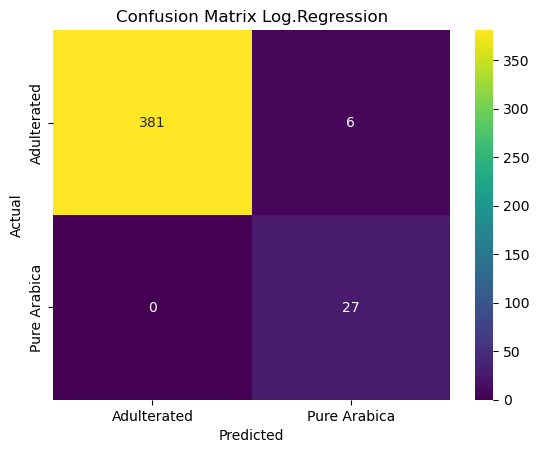

In [160]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Adulterated","Pure Arabica"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Log.Regression')
plt.show()

- `Logstic model achieves an accuracy of 0.99`. The model `predicts all the pure Arabica samples correctly`. However, the model misclassifies 6 adulterated coffee samples as pure Arabica. 

In [162]:
# Convert categorical labels to numeric (0 = Pure Arabica, 1 = Adulterated)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)  # Converts to 0 & 1
y_pred_numeric = label_encoder.fit_transform(y_pred)

# Compute predicted probabilities for the positive class (1 = Adulterated)
y_pred_proba = logr.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric, pos_label=1)

# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_pred_numeric)

# Compute AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

# Print ROC-AUC SCore
print(f"ROC-AUC Score: {roc_auc:.3f}")


ROC-AUC Score: 0.995


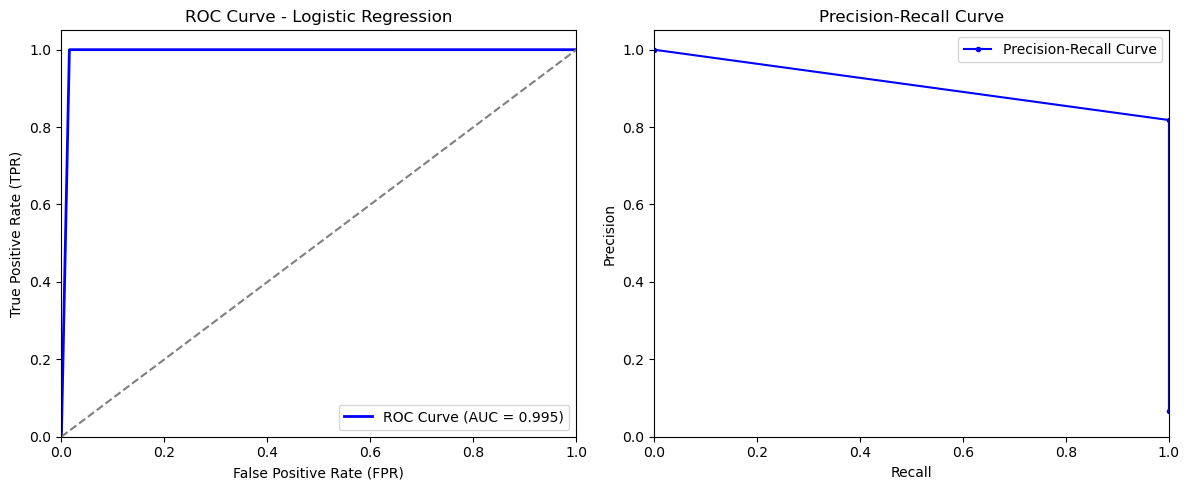

In [163]:
# Create Figure with Two Subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 Row, 2 Columns

#  Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve - Logistic Regression')
ax[0].legend(loc="lower right")


# Plot Precision-Recall Curve
ax[1].plot(recall, precision, marker='.', color='b', label='Precision-Recall Curve')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()


# Adjust Layout
plt.tight_layout()
plt.show()

#### **K-Nearest Neighbors**

In [165]:
# Generate a list of  odd k numbers 
k_values = list(range(3,31,2))

# Initialize KNN Classifier
knn = KNeighborsClassifier()
                
# Define parameter grid
param_grid = {'n_neighbors': k_values}
                
# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the Model                
grid_search_knn.fit(X_train_pca, y_train_smote)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             scoring='accuracy')

In [166]:
# Get the best parameters
best_k = grid_search_knn.best_params_['n_neighbors']
best_score = grid_search_knn.best_score_

print(f"Best k: {best_k}")
print(f'Best Score for KNN Model on cross-validation: {best_score:.3f}')

Best k: 3
Best Score for KNN Model on cross-validation: 0.995


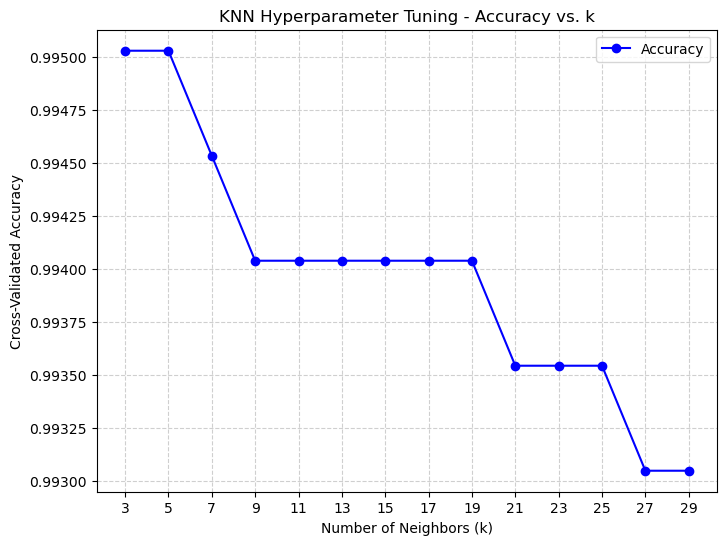

In [167]:
# Extract results from GridSearchCV
mean_accuracy = grid_search_knn.cv_results_['mean_test_score']

# Plot accuracy vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_accuracy, marker='o', linestyle='-', color='b', label="Accuracy")

# Formatting
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Hyperparameter Tuning - Accuracy vs. k")
plt.xticks(k_values)  
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

In [168]:
# Save the KNN model
joblib.dump(grid_search_knn, "knn_classification_model.pkl")

best_knn = grid_search_knn.best_estimator_ # Best model

joblib.dump(best_knn,'best_knn_classification_model.pkl') # Save the best model

['best_knn_classification_model.pkl']

In [169]:
# Evaluate performance of the KNN model on the test set
y_pred = best_knn.predict(X_test_pca)

# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.995

Confusion Matrix:
[[385   2]
 [  0  27]]

Classification Report:
              precision    recall  f1-score   support

 adulterated       1.00      0.99      1.00       387
pure_arabica       0.93      1.00      0.96        27

    accuracy                           1.00       414
   macro avg       0.97      1.00      0.98       414
weighted avg       1.00      1.00      1.00       414



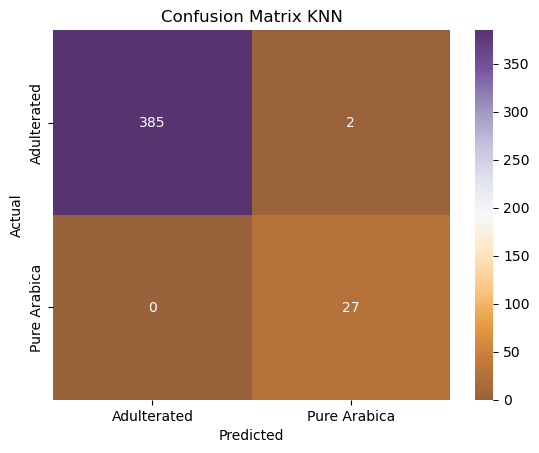

In [170]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Adulterated","Pure Arabica"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'PuOr',fmt='d',alpha=0.8)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

In [171]:
# Convert categorical labels to numeric (0 = Pure Arabica, 1 = Adulterated)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)  # Converts to 0 & 1
y_pred_numeric = label_encoder.fit_transform(y_pred)

# Compute predicted probabilities for the positive class (1 = Adulterated)
y_pred_proba = grid_search_knn.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric, pos_label=1)

# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_pred_numeric)

# Compute AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

# Print ROC-AUC SCore
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.999


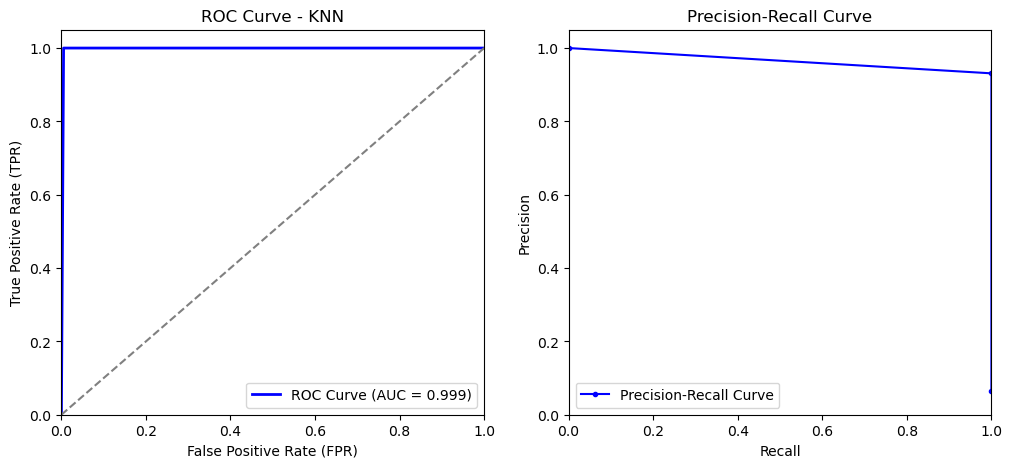

In [172]:
# Create Figure with Two Subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 Row, 2 Columns

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--') 
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve - KNN')
ax[0].legend(loc="lower right")

# 🔹 Plot Precision-Recall Curve
ax[1].plot(recall, precision, marker='.', color='b', label='Precision-Recall Curve')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()

# Adjust Layout
plt.show()

#### **Partial Least Discriminant Analysis**

In [174]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline

In [175]:

# Convert X to numpy
X_pls_train = np.array(X_train_smote)
X_pls_test = np.array(X_test)

# Convert categorical variables to numeric
label_encoder = LabelEncoder()
y_pls_train = label_encoder.fit_transform(y_train_smote)
y_pls_test = label_encoder.transform(y_test)

# Scale the data
scaler = StandardScaler()
X_pls_train_scaled = scaler.fit_transform(X_pls_train)
X_pls_test_scaled = scaler.transform(X_pls_test)

# Instatiate PLSDA model
pls = PLSRegression()

# Define the Parameter Grid
param_grid = {'n_components': list(range(1, 30))}

# Perform GridSerachCV CV
grid_search_plsda = GridSearchCV(pls,param_grid,cv=10,scoring='neg_mean_squared_error', n_jobs=-1)

# start of training
start_time = time.time()

# Fit the model
grid_search_plsda.fit(X_pls_train_scaled,y_pls_train)

# end training time
end_time = time.time()

time_taken = (end_time - start_time) / 60

print(f'Time taken to train the model is: {time_taken:.2f} minutes')

Time taken to train the model is: 0.10 minutes


In [176]:
# Optimal number of components
best_n_components = grid_search_plsda.best_params_['n_components']
best_score = -grid_search_plsda.best_score_  # Convert back to positive MSE

print(f"Best number of PLS components: {best_n_components}")
print(f"Best Negative MSE: {best_score:.3f}")

Best number of PLS components: 23
Best Negative MSE: 0.017


In [177]:
# Fit Best PLS-DA Model
best_plsda = grid_search_plsda.best_estimator_
best_plsda.fit(X_pls_train_scaled, y_pls_train)

PLSRegression(n_components=23)

In [178]:
# Save the PLSDA model
joblib.dump(best_plsda, "best_plsda_classification_model.pkl")

['best_plsda_classification_model.pkl']

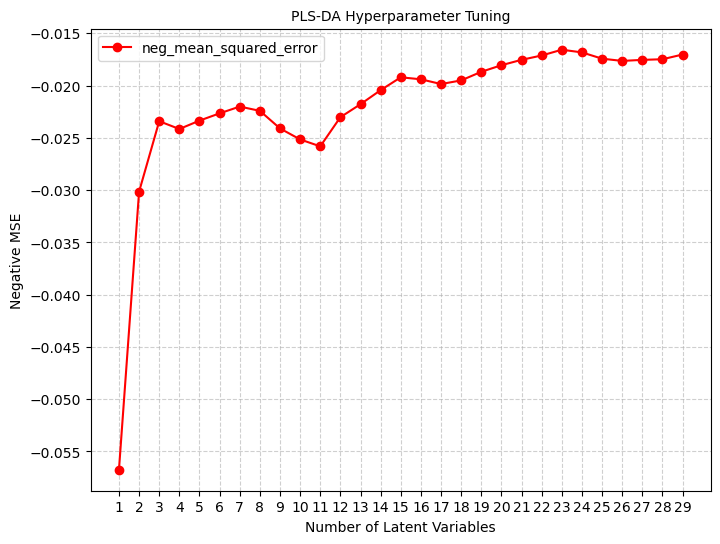

In [179]:
# Plot LVs vs Accuracy
n_components = list(range(1,30))
mean_accuracy =grid_search_plsda.cv_results_['mean_test_score']

# Plot accuracy vs. LVs
plt.figure(figsize=(8, 6))
plt.plot(n_components, mean_accuracy, marker='o', linestyle='-', color='r', label="neg_mean_squared_error")

# Formatting
plt.xlabel("Number of Latent Variables")
plt.ylabel("Negative MSE")
plt.title("PLS-DA Hyperparameter Tuning", fontsize = 10)
plt.xticks(n_components)  
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

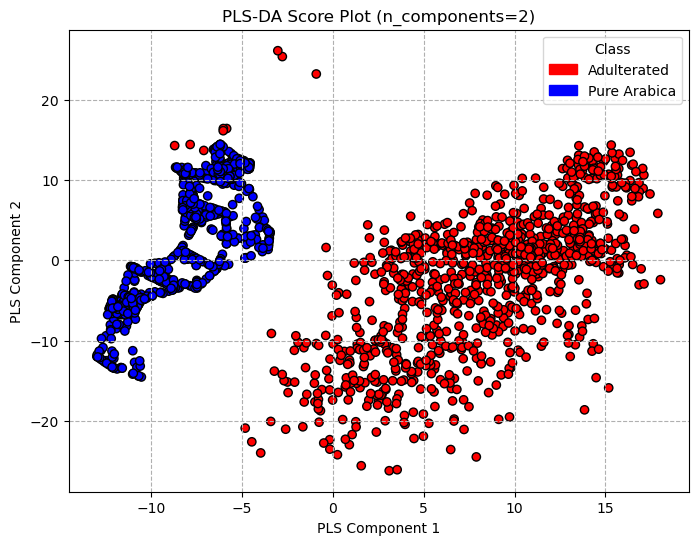

In [180]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# Plot PLSDA scores
custom_cmap = ListedColormap(["red", "blue"]) #(Adulterated = Red, Pure Arabica = Blue)
n_components = 2
X_scores = best_plsda.transform(X_pls_train_scaled)

# Plot PLS-DA Score Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scores[:, 0], X_scores[:, 1],
                      c=y_pls_train, cmap=custom_cmap, 
                      edgecolors='k', alpha=1.0)

plt.xlabel("PLS Component 1")
plt.ylabel("PLS Component 2")
plt.title(f"PLS-DA Score Plot (n_components={n_components})")

# Add Legend Indicating Class Colors
legend_adulterated = mpatches.Patch(color='red', label='Adulterated')
legend_pure = mpatches.Patch(color='blue', label='Pure Arabica')
plt.legend(handles=[legend_adulterated, legend_pure], title="Class", loc="upper right")

plt.grid(True, linestyle="--", alpha=1.0)
plt.show()

In [181]:
grid_search_plsda.best_estimator_

PLSRegression(n_components=23)

In [182]:
# Test the model

#Predict Class Probabilities
y_pred_proba = best_plsda.predict(X_pls_test_scaled)  # Continuous output
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert to binary labels

# Evaluate Model
print(f"\nTest Accuracy: {accuracy_score(y_pls_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_pls_test, y_pred, target_names=label_encoder.classes_))


Test Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

 adulterated       1.00      1.00      1.00       387
pure_arabica       1.00      1.00      1.00        27

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414



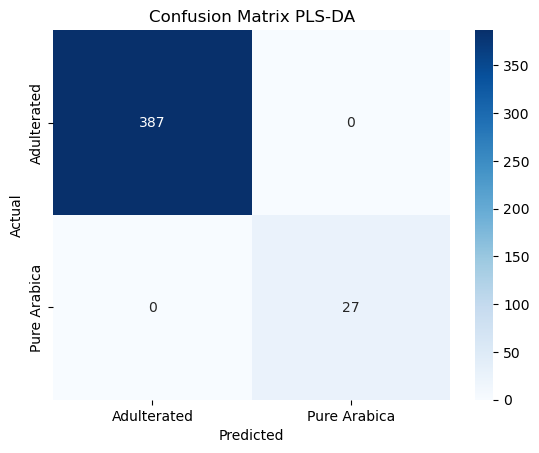

In [183]:
# Plot the confusion matrix
cm = confusion_matrix(y_pls_test, y_pred)

# Define the correct label names
class_labels = ["Adulterated","Pure Arabica"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'Blues',fmt='d',alpha=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PLS-DA')
plt.show()

- PLS-DA predicts all the samples correctly.

In [185]:
# Compute predicted probabilities for the positive class (1 = Adulterated)
y_pred_proba = best_plsda.predict(X_pls_test_scaled)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_pls_test, y_pred_proba, pos_label=1)

# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_pls_test, y_pred_proba)

# Compute AUC score
roc_auc = roc_auc_score(y_pls_test, y_pred_proba)

# Print ROC-AUC SCore
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 1.000


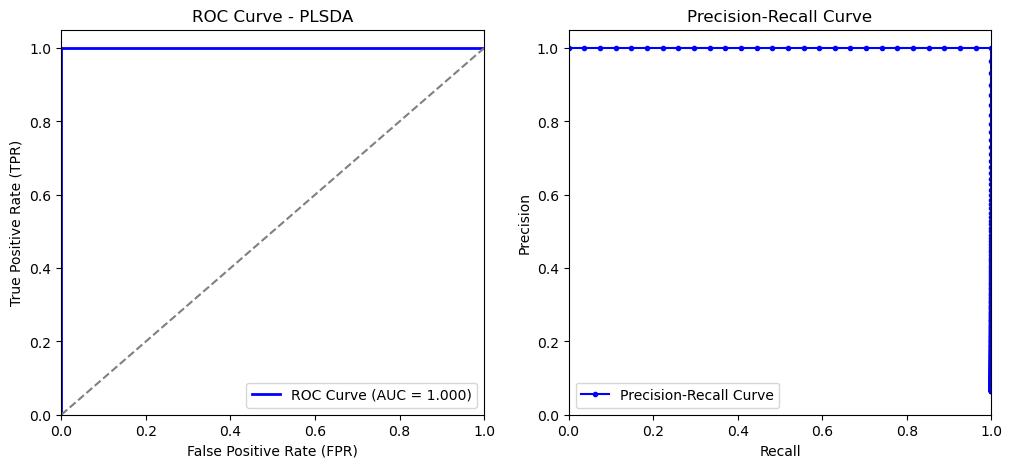

In [186]:
# Create Figure with Two Subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 Row, 2 Columns

# 🔹 Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--') 
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve - PLSDA')
ax[0].legend(loc="lower right")

# 🔹 Plot Precision-Recall Curve
ax[1].plot(recall, precision, marker='.', color='b', label='Precision-Recall Curve')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()

# Adjust Layout
plt.show()

#### **Decision Trees**

In [188]:
# Instatiate the decision tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Set up the parameter grid for the GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit decision tree model
grid_search_dt.fit(X_train_pca,y_train_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [189]:
print(f'Best score for the DTree CV Model: {grid_search_dt.best_score_:.3f}')

Best score for the DTree CV Model: 0.994


In [190]:
# Get the optimal parameters

best_params = grid_search_dt.best_params_
best_dtree = grid_search_dt.best_estimator_

print(f'Best Parameters:\n {best_params}')
print(f'Best estimator:\n {best_dtree}')

Best Parameters:
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator:
 DecisionTreeClassifier(criterion='entropy', random_state=42)


In [191]:
# Save the model
joblib.dump(best_dtree, 'Best_Decision_Tree_Classification_model.pkl')

['Best_Decision_Tree_Classification_model.pkl']

In [192]:
# Make predictions
y_pred =best_dtree.predict(X_test_pca)

In [193]:
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.988

Confusion Matrix:
[[385   2]
 [  3  24]]

Classification Report:
              precision    recall  f1-score   support

 adulterated       0.99      0.99      0.99       387
pure_arabica       0.92      0.89      0.91        27

    accuracy                           0.99       414
   macro avg       0.96      0.94      0.95       414
weighted avg       0.99      0.99      0.99       414



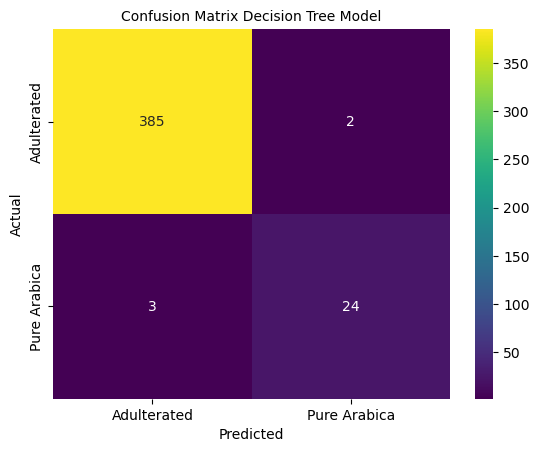

In [194]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Adulterated","Pure Arabica"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree Model', fontsize=10)
plt.show()

In [195]:
# Convert categorical labels to numeric (0 = Pure Arabica, 1 = Adulterated)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)  # Converts to 0 & 1
y_pred_numeric = label_encoder.fit_transform(y_pred)

# Compute predicted probabilities for the positive class (1 = Adulterated)
y_pred_proba =best_dtree.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric, pos_label=1)

# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_pred_numeric)

# Compute AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

# Print ROC-AUC SCore
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.942


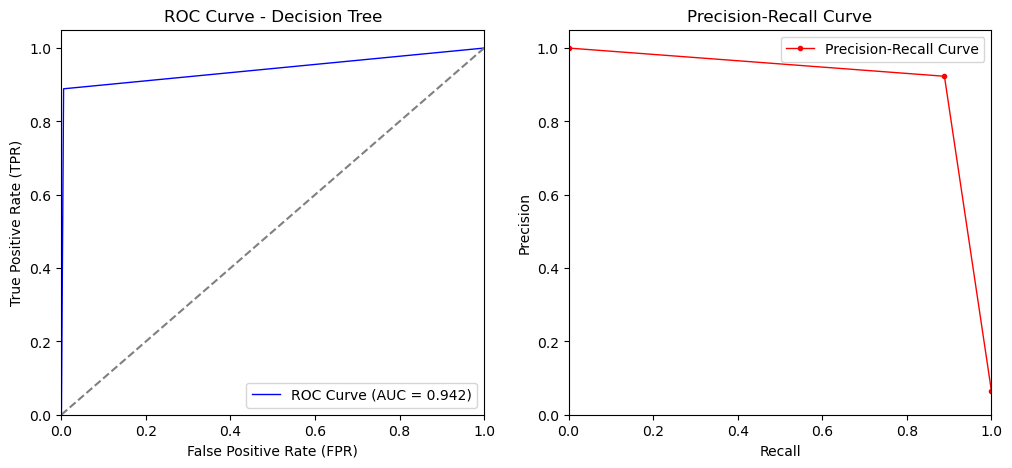

In [196]:
# Create Figure with Two Subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 Row, 2 Columns

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', lw=1, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--') 
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve - Decision Tree')
ax[0].legend(loc="lower right")

# Plot Precision-Recall Curve
ax[1].plot(recall, precision, marker='.', color='r', lw=1, label='Precision-Recall Curve')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()

# Adjust Layout
plt.show()

#### **Random Forest**

In [198]:
# Define Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Set up parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'criterion': ['gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
    
# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) 
    
# Train the Random Forest Model
grid_search_rf.fit(X_train_pca,y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [199]:
# Get the best parameters for the Random Forest Model
best_params = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

print(f'Best Parameters:\n {best_params}')
print(f'Best estimator:\n {best_rf}')

Best Parameters:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best estimator:
 RandomForestClassifier(n_estimators=50, random_state=42)


In [200]:
# Save the model
joblib.dump(grid_search_rf.best_estimator_, 'Best_Random_Forest_Classification_model.pkl')

['Best_Random_Forest_Classification_model.pkl']

In [201]:
# Make predictions
y_pred = best_rf.predict(X_test_pca)

In [202]:
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.988

Confusion Matrix:
[[386   1]
 [  4  23]]

Classification Report:
              precision    recall  f1-score   support

 adulterated       0.99      1.00      0.99       387
pure_arabica       0.96      0.85      0.90        27

    accuracy                           0.99       414
   macro avg       0.97      0.92      0.95       414
weighted avg       0.99      0.99      0.99       414



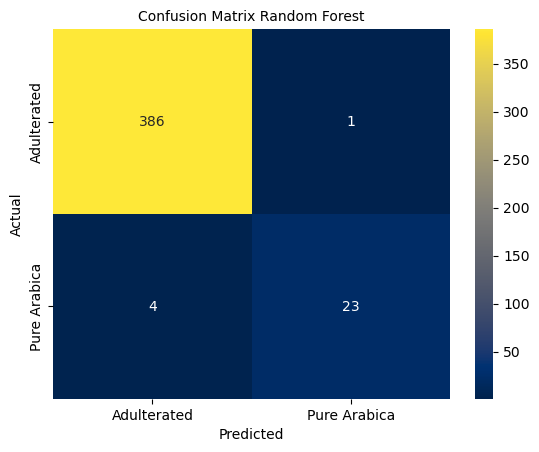

In [203]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Adulterated","Pure Arabica"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'cividis',fmt='d',alpha=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest', fontsize=10)
plt.show()

In [204]:
# Convert categorical labels to numeric (0 = Pure Arabica, 1 = Adulterated)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)  # Converts to 0 & 1
y_pred_numeric = label_encoder.fit_transform(y_pred)

# Compute predicted probabilities for the positive class (1 = Adulterated)
y_pred_proba = best_rf.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric, pos_label=1)

# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_pred_numeric)

# Compute AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

# Print ROC-AUC SCore
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.999


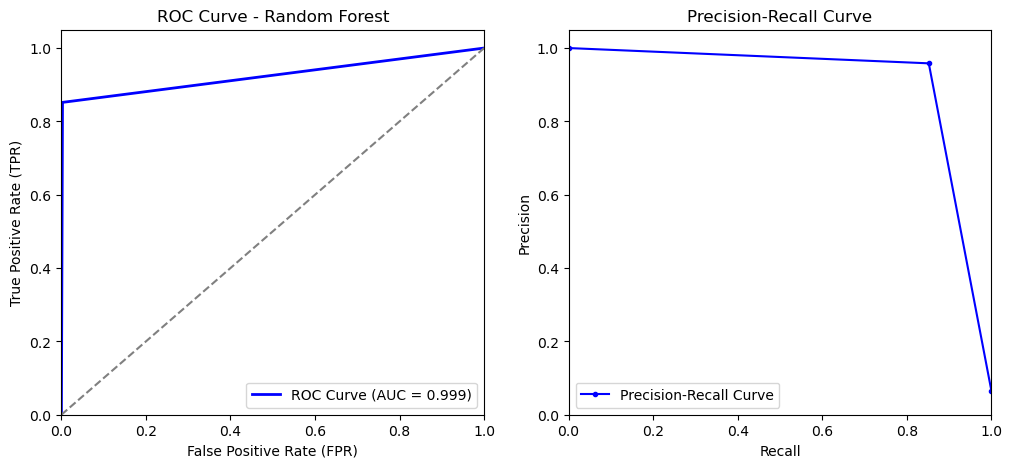

In [205]:
# Create Figure with Two Subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 Row, 2 Columns

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--') 
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve - Random Forest')
ax[0].legend(loc="lower right")

# Plot Precision-Recall Curve
ax[1].plot(recall, precision, marker='.', color='b', label='Precision-Recall Curve')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()

# Adjust Layout
plt.show()

#### **Support Vector Machine (SVM)**

In [207]:
# Define SVM
svm_model = SVC(random_state=42,probability=True,)

# Define Hyperparameter Grid 
param_grid = {
    'C': [0.1, 1, 5,10],  
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
    'gamma': ['scale', 'auto'], 
} 

# Perform Grid Search

grid_search_svm = GridSearchCV(svm_model, param_grid=param_grid,scoring='accuracy',cv=10, n_jobs=-1,verbose=2)

# Fit the model
grid_search_svm.fit(X_train_pca,y_train_smote)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [208]:
# Print the best parameters
best_svm = grid_search_svm.best_estimator_
best_params = grid_search_svm.best_params_

print(f'Best Parameters: {best_params}')

Best Parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}


In [209]:
# Save the model
joblib.dump(grid_search_svm.best_estimator_, 'Best_SVM_Classification_model.pkl')

['Best_SVM_Classification_model.pkl']

In [210]:
# Test the model 
y_pred = best_svm.predict(X_test_pca)

In [211]:
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.990

Confusion Matrix:
[[384   3]
 [  1  26]]

Classification Report:
              precision    recall  f1-score   support

 adulterated       1.00      0.99      0.99       387
pure_arabica       0.90      0.96      0.93        27

    accuracy                           0.99       414
   macro avg       0.95      0.98      0.96       414
weighted avg       0.99      0.99      0.99       414



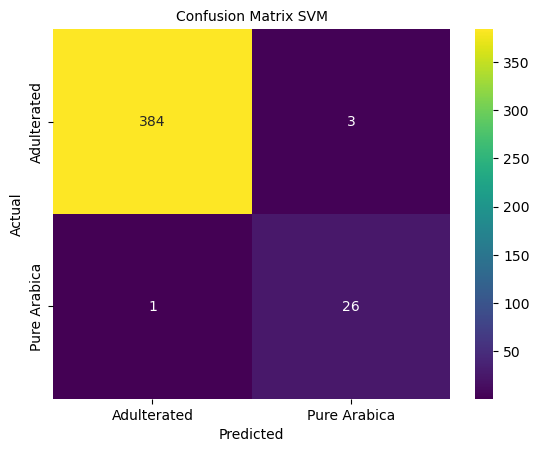

In [212]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Adulterated","Pure Arabica"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM', fontsize=10)
plt.show()

In [213]:
# Convert categorical labels to numeric (0 = Pure Arabica, 1 = Adulterated)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)  # Converts to 0 & 1
y_pred_numeric = label_encoder.fit_transform(y_pred)

# Compute predicted probabilities for the positive class (1 = Adulterated)
y_pred_proba = grid_search_svm.best_estimator_.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric, pos_label=1)

# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_pred_numeric)

# Compute AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

# Print ROC-AUC SCore
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.998


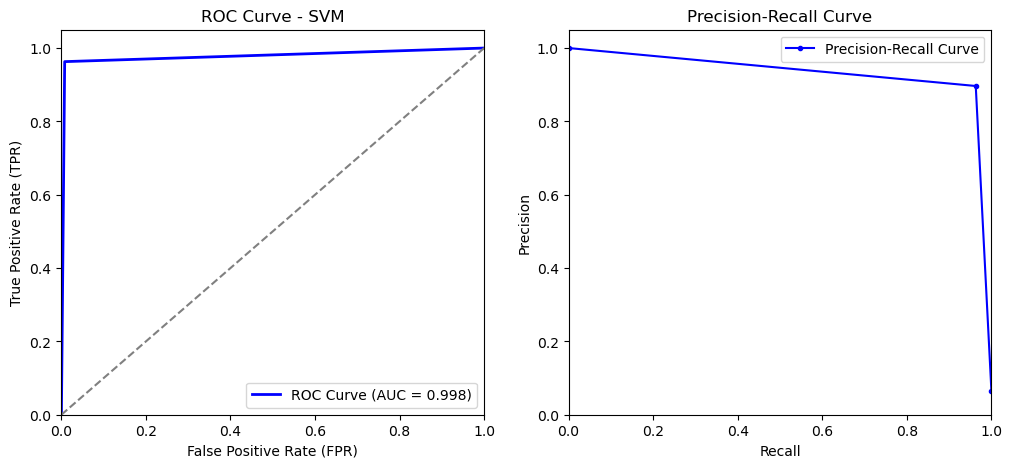

In [214]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 Row, 2 Columns

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--') 
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve - SVM')
ax[0].legend(loc="lower right")

# Plot Precision-Recall Curve
ax[1].plot(recall, precision, marker='.', color='b', label='Precision-Recall Curve')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()

# Adjust Layout
plt.show()

#### **XGBoost Classification**

In [216]:
# Convert categorical labels to numeric (0 = Pure Arabica, 1 = Adulterated)
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train_smote)  # Converts to 0 & 1
y_test_numeric = label_encoder.transform(y_test)

# Define the model
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 0.9]  # Fraction of features used per tree
}

start_time = time.time()

# GridSearchCV with 10-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model,param_grid=param_grid,scoring='accuracy',cv=10,verbose=1,n_jobs=-1)

# Fit the model
grid_search_xgb.fit(X_train_pca,y_train_numeric)

end_time = time.time()
time_taken = (end_time - start_time) / 60

grid_search_xgb.fit

print(f'Time taken to run the XGB model: {time_taken:.2f} minutes')

Fitting 10 folds for each of 729 candidates, totalling 7290 fits
Time taken to run the XGB model: 3.04 minutes


In [217]:
# Get best parameters and model
best_params = grid_search_xgb.best_params_
best_model = grid_search_xgb.best_estimator_

print(f'The best parameters for the model: {best_params}')

The best parameters for the model: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.7}


In [218]:
# Save the model
joblib.dump(grid_search_xgb.best_estimator_,'Best_XGB_Classification_Model.pkl')

['Best_XGB_Classification_Model.pkl']

In [219]:
# Predict on test data
y_pred = best_model.predict(X_test_pca)

In [220]:
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test_numeric, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_numeric, y_pred))

Test Accuracy: 0.983

Confusion Matrix:
[[383   4]
 [  3  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       387
           1       0.86      0.89      0.87        27

    accuracy                           0.98       414
   macro avg       0.92      0.94      0.93       414
weighted avg       0.98      0.98      0.98       414



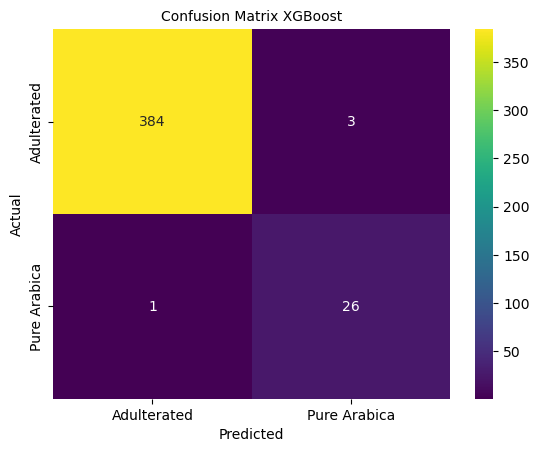

In [221]:
# Plot the confusion matrix
cm = confusion_matrix(y_test_numeric, y_pred_numeric)

# Define the correct label names
class_labels = ["Adulterated","Pure Arabica"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost', fontsize=10)
plt.show()

In [222]:
# Convert categorical labels to numeric (0 = Pure Arabica, 1 = Adulterated)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)  # Converts to 0 & 1
y_pred_numeric = label_encoder.fit_transform(y_pred)

# Compute predicted probabilities for the positive class (1 = Adulterated)
y_pred_proba = grid_search_xgb.best_estimator_.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric, pos_label=1)

# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_pred_numeric)

# Compute AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

# Print ROC-AUC SCore
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.995


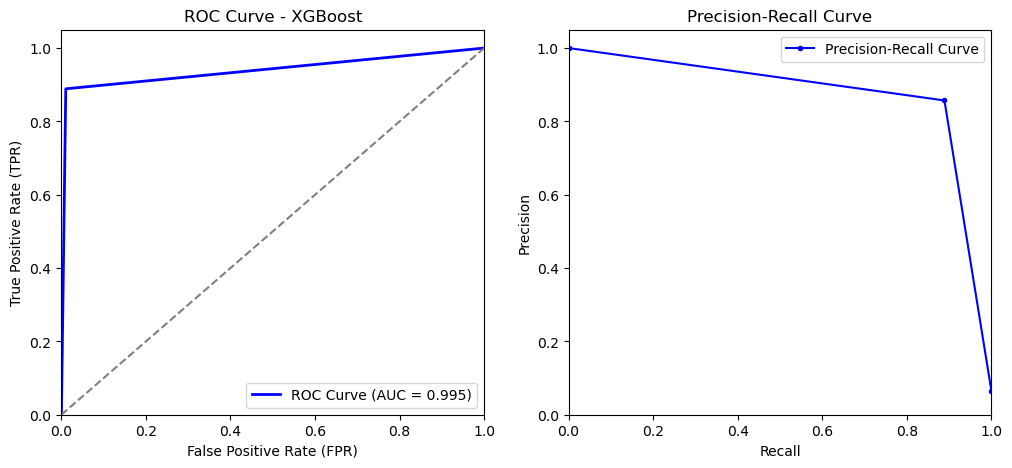

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 Row, 2 Columns

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--') 
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve - XGBoost')
ax[0].legend(loc="lower right")

# Plot Precision-Recall Curve
ax[1].plot(recall, precision, marker='.', color='blue', label='Precision-Recall Curve')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()

# Adjust Layout
plt.show()

#### **Multi-Layer Perceptron (MLP) Classifier**

In [225]:
# Define MLP model
mlp = MLPClassifier(max_iter=500, random_state=42)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 50, 25)],  # Varying number of layers/neurons
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant', 'adaptive']  # Learning rate strategy
}

# GridSearchCV with 10-fold cross-validation
grid_search_mlp = GridSearchCV(estimator=mlp,param_grid=param_grid,scoring='accuracy',cv=10,verbose=1,n_jobs=-1)

start_time = time.time()

# Fit the MLP model
grid_search_mlp.fit(X_train_pca,y_train_smote)

end_time = time.time()

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [226]:
time_taken = (end_time-start_time) / 60
print(f'The time taken to run the MLP model is {time_taken:.2f} minutes')

The time taken to run the MLP model is 4.50 minutes


In [227]:
grid_search_mlp

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (100, 50),
                                                (100, 50, 25)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=1)

In [228]:
# print the best parameters and model
best_param = grid_search_mlp.best_params_
best_mlp = grid_search_mlp.best_estimator_

print(f'The best parameters for the model are: {best_param}')
print(f'The best score: {grid_search_mlp.best_score_:2f}')

The best parameters for the model are: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
The best score: 0.995027


In [229]:
# Save the model
joblib.dump(grid_search_mlp,'mlp_grid_search.pkl')
joblib.dump(best_mlp,'best_mlp_model.pkl')

['best_mlp_model.pkl']

In [230]:
# Prediction on the test set
y_pred = best_mlp.predict(X_test_pca)

In [231]:
# Print model evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.983

Confusion Matrix:
[[382   5]
 [  2  25]]

Classification Report:
              precision    recall  f1-score   support

 adulterated       0.99      0.99      0.99       387
pure_arabica       0.83      0.93      0.88        27

    accuracy                           0.98       414
   macro avg       0.91      0.96      0.93       414
weighted avg       0.98      0.98      0.98       414



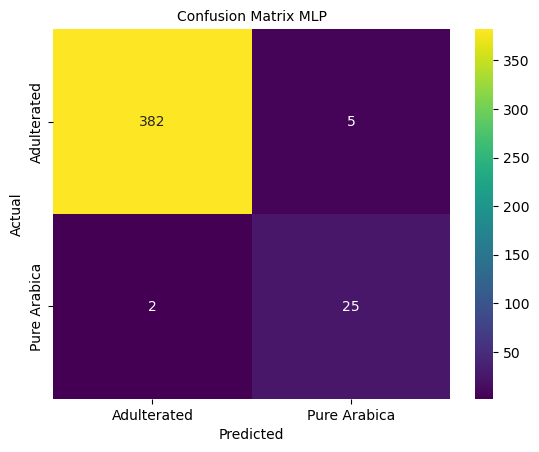

In [232]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the correct label names
class_labels = ["Adulterated","Pure Arabica"]

cm_df = pd.DataFrame(cm, columns=class_labels, index=class_labels)

# Plot the confusion matrix
sns.heatmap(cm_df, annot=True, cmap = 'viridis',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix MLP', fontsize=10)
plt.show()

In [233]:
# Convert categorical labels to numeric (0 = Pure Arabica, 1 = Adulterated)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)  # Converts to 0 & 1
y_pred_numeric = label_encoder.fit_transform(y_pred)

# Compute predicted probabilities for the positive class (1 = Adulterated)
y_pred_proba = grid_search_mlp.best_estimator_.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric, pos_label=1)

# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test_numeric, y_pred_numeric)

# Compute AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)

# Print ROC-AUC SCore
print(f"ROC-AUC Score: {roc_auc:.3f}")

ROC-AUC Score: 0.995


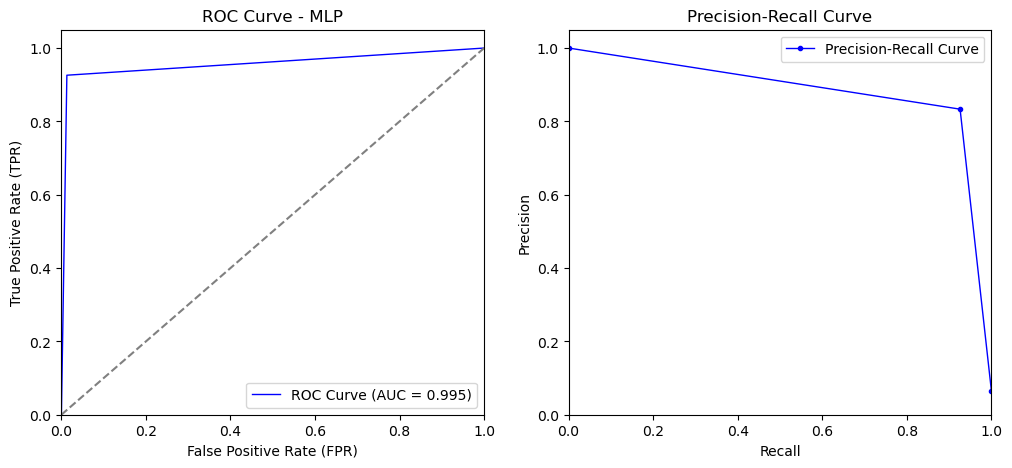

In [234]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 Row, 2 Columns

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', lw=1, label=f'ROC Curve (AUC = {roc_auc:.3f})')
ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--') 
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve - MLP')
ax[0].legend(loc="lower right")

# Plot Precision-Recall Curve
ax[1].plot(recall, precision, marker='.', color='blue', linewidth = 1, label='Precision-Recall Curve')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend()

# Adjust Layout
plt.show()

#### **7. Test Saved Model (Picke) on Test Set**

In [236]:
# SVM-Model
svm_loaded_model = joblib.load("Best_SVM_Classification_model.pkl")

print(svm_loaded_model)

SVC(C=5, probability=True, random_state=42)


In [237]:
# Use the loaded model for prediction 
y_loaded_pred = svm_loaded_model.predict(X_test_pca)


# Evaluate the performance of the model
print(f'Accuracy: {accuracy_score(y_test,y_loaded_pred)}')
print(f'Classification Report:\n {classification_report(y_test,y_loaded_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test,y_loaded_pred)}')

Accuracy: 0.9903381642512077
Classification Report:
               precision    recall  f1-score   support

 adulterated       1.00      0.99      0.99       387
pure_arabica       0.90      0.96      0.93        27

    accuracy                           0.99       414
   macro avg       0.95      0.98      0.96       414
weighted avg       0.99      0.99      0.99       414

Confusion Matrix:
 [[384   3]
 [  1  26]]


- Saved models are functional and can be used for future predictions in the local environment. 

#### **8. Classification Summary Results**

In [241]:
summary_results = {
    'Model': ['LDA', 'PLSDA', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'MLP'],
    'Accuracy': [1.00, 1.00, 0.995, 0.988, 0.988, 0.983, 0.990, 0.983]  
}

# Convert dictionary to a DataFrame
df_results = pd.DataFrame(summary_results)
df_results.T

,0,1,2,3,4,5,6,7
Model,LDA,PLSDA,KNN,Decision Tree,Random Forest,XGBoost,SVM,MLP
Accuracy,1.0,1.0,0.995,0.988,0.988,0.983,0.99,0.983


#### **9. Conclusion and Recommendations**

- The classification models demonstrated exceptional performance in distinguishing pure Arabica coffee from adulterated samples. Linear Discriminant Analysis (LDA) and Partial Least Squares Discriminant Analysis (PLS-DA) achieved perfect accuracy (100%), indicating that the spectral data exhibits strong linear separability. 
- K-Nearest Neighbors (KNN) followed closely with 99.5% accuracy, suggesting that neighboring spectral profiles are well-clustered. Decision Tree and Random Forest classifiers performed similarly (98.8%), showing that tree-based models were effective but did not significantly outperform one another. 
- XGBoost and Support Vector Machine (SVM) achieved slightly lower accuracies (98.3% and 99.0%, respectively), possibly due to the data being largely linear.
- Multilayer Perceptron (MLP) had the lowest performance (98.3%), likely due to the relatively small dataset size, which limited the advantages of deep learning. 
- Given these results, LDA and PLS-DA are the most suitable models for coffee adulteration detection on hyperspectral imaging dataset subjected to multiplicative scatter correction, savitzky golay treatment and second derivative, offering both high accuracy and interpretability. 